In [2]:
# Description: An stock analyse program
# Autor : SICHENG ZHAO
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
# Block 0 Data importing
import tushare as ts
token=""
pro = ts.pro_api(token)
# 1.上市股票列表
stocklist = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

# 2.获取行情数据
s1=pro.query('daily', ts_code='000001.SZ', start_date='20200601', end_date='202001101')

,trade_date,close,pct_chg,vol,Log_T,Diff_Log_Return,Diff_Log_Return(in %)


,trade_date,close,pct_chg,vol,Log_T,Diff_Log_Return,Diff_Log_Return(in %)
count,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0


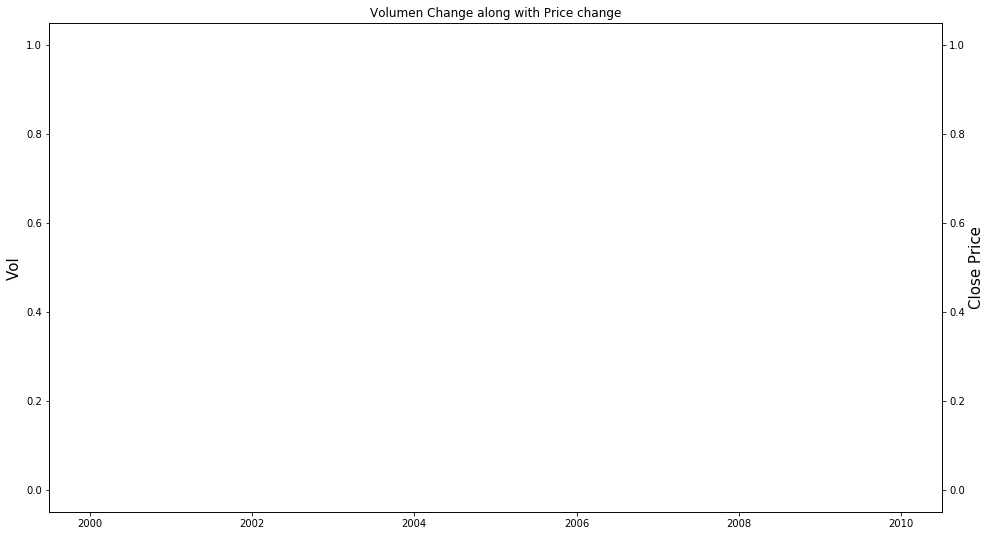

C:\Users\Microsft\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Microsft\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Microsft\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


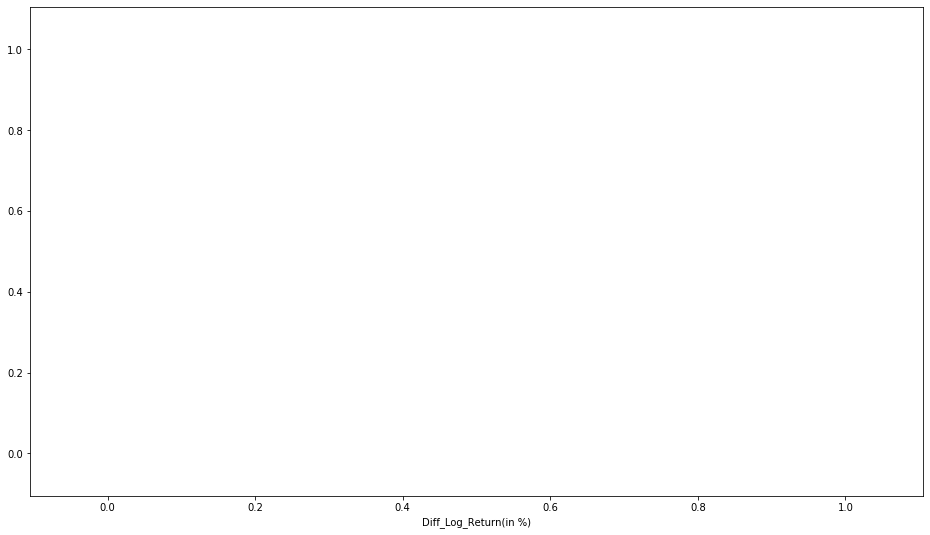

In [38]:
def ProcessData(df):
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    df.sort_values("trade_date",inplace=True)
    data_df = df.loc[:,["trade_date","close","pct_chg","vol"]]
    data_df.set_index("trade_date")
    data_df["Log_T"]=data_df["close"].apply(np.log)
    data_df["Diff_Log_Return"]=data_df["Log_T"].diff(1)
    data_df["Diff_Log_Return(in %)"]=data_df["Diff_Log_Return"].multiply(100)
    display(data_df)
    return(data_df)

s1_processed= ProcessData(s1)
# 0. Statistics of the data
display(s1_processed.describe())
# 1. Vol change
x = s1_processed["trade_date"]
y1 = s1_processed["vol"]
y2 = s1_processed["close"]
plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,alpha=.7,color='g')
ax1.set_ylabel('Vol',fontsize='15')
ax2 = ax1.twinx()   
ax2.plot(x, y2, 'r',ms=10)
ax2.set_ylabel('Close Price',fontsize='15')
plt.title("Volumen Change along with Price change")
plt.show()
# 2. Distribution Plot
sns.set_palette("hls")
mpl.rc("figure", figsize=(16,9))
sns.distplot(s1_processed["Diff_Log_Return(in %)"])

TypeError: cannot convert the series to <class 'float'>

False

In [26]:
stocklist

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国农科技,深圳,互联网,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427
5,000007.SZ,000007,全新好,深圳,酒店餐饮,19920413
6,000008.SZ,000008,神州高铁,北京,运输设备,19920507
7,000009.SZ,000009,中国宝安,深圳,综合类,19910625
8,000010.SZ,000010,美丽生态,深圳,建筑工程,19951027
9,000011.SZ,000011,深物业A,深圳,区域地产,19920330


In [36]:
s1

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
